# Point source on top  of a halfspace

**Overview:** We are going to play with the solutions for a concentrated force located at $(0,0,0)$. Positive $z$ is inside the medium.

In [1]:
from __future__ import division
from sympy import *
from sympy import symbols
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams
 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 18
rcParams['axes.titlesize'] = 20

x, y, z, r, E, nu, Fx, Fy, Fz = symbols('x y z r E nu F1 F2 F3')
init_printing()

In [2]:
ux = (1+nu)/(2*pi*E)*((x*z/r**3 - (1-2*nu)*x/(r*(r+z)))*Fz + (2*(1-nu)*r+z)/(r*(r+z))*Fx + ((2*r*(nu*r + z) + z**2)*x)/(r**3*(r+z)**2)*(x*Fx + y*Fy))
uy = (1+nu)/(2*pi*E)*((y*z/r**3 - (1-2*nu)*y/(r*(r+z)))*Fz + (2*(1-nu)*r+z)/(r*(r+z))*Fy + ((2*r*(nu*r + z) + z**2)*y)/(r**3*(r+z)**2)*(x*Fx + y*Fy))
uz = (1+nu)/(2*pi*E)*((2*(1-2*nu)/r + z**2/r**3)*Fz + (((1-2*nu)/(r*(r+z)) + z/r**3)*y)*(x*Fx + y*Fy))

Withouth loss of generality we can assume that $F_y=0$, this is equivalent a rotate the axes until the force is in the plane $y=0$.

In [3]:
ux = ux.subs(Fy, 0)
ux

(nu + 1)*(F1*(r*(-2*nu + 2) + z)/(r*(r + z)) + F1*x**2*(2*r*(nu*r + z) + z**2)/(r**3*(r + z)**2) + F3*(-x*(-2*nu + 1)/(r*(r + z)) + x*z/r**3))/(2*pi*E)

In [4]:
uy = ux.subs(Fy, 0)
uy

(nu + 1)*(F1*(r*(-2*nu + 2) + z)/(r*(r + z)) + F1*x**2*(2*r*(nu*r + z) + z**2)/(r**3*(r + z)**2) + F3*(-x*(-2*nu + 1)/(r*(r + z)) + x*z/r**3))/(2*pi*E)

In [5]:
uz = uz.subs(Fy, 0)
uz

(nu + 1)*(F1*x*y*((-2*nu + 1)/(r*(r + z)) + z/r**3) + F3*((-4*nu + 2)/r + z**2/r**3))/(2*pi*E)

The displacement vector is then

In [6]:
u = Matrix([ux, uy, uz])

Let us check if the displacement vanish when $x,y,z \rightarrow \infty$

In [7]:
rdef = sqrt(x**2 + y**2 + z**2)
for k in range(3):
    print limit(u[k].subs(r, rdef), x, oo), limit(u[k].subs(r, rdef), y, oo), limit(u[k].subs(r, rdef), z, oo)

0 0 0
0 0 0
0 0 0


In [8]:
def sym_grad(u, x):
    """Compute the symmetric gradient of u wrt to x"""
    return Matrix(3, 3, lambda i,j:
                  S(1)/2*(diff(u[i], x[j]) + diff(u[j], x[i])))


def strain_to_stress(e, E, nu):
    """Strain to stress relation (Hooke's law)"""
    lamda = E*nu/(1 + nu)/(1 - 2*nu)
    mu = E/2/(1 + nu)
    delta = eye(3)
    return Matrix(3, 3, lambda i,j: 
       lamda*(e[0,0] + e[1,1] + e[2,2])*delta[i,j] + 2*mu*e[i,j])

In [9]:
e = sym_grad(u, [x,y,z])

In [10]:
sigma = strain_to_stress(e, E, nu)

Let us check if the strains and stress components vanish when $x,y,z \rightarrow \infty$

In [11]:
#for row in range(3):
#    for col in range(3):
#        print limit(e[row, col].subs(r, rdef), x, oo), limit(e[row, col].subs(r, rdef), y, oo),
#        print limit(e[row, col].subs(r, rdef), z, oo)

In [12]:
#for row in range(3):
#    for col in range(3):
#        print limit(sigma[row, col].subs(r, rdef), x, oo), limit(sigma[row, col].subs(r, rdef), y, oo),
#        print limit(sigma[row, col].subs(r, rdef), z, oo)

## Visualization of the fields

In [13]:
x_vec, z_vec = np.mgrid[-2:2:100j, 0:5:100j]

In [14]:
%matplotlib inline
#%matplotlib notebook

def field_plot(expr, x_vec, y_vec, z_vec, E_val, nu_val, Fx_val, Fz_val, title=''):
    """Plot the field""" 
    
    # Lamdify the function
    expr_fun = lambdify((x, y, z, E, nu, Fx, Fz), expr.subs(r, rdef), "numpy")
    expr_vec = expr_fun(x_vec, y_vec, z_vec, E_val, nu_val, Fx_val, Fz_val) 
    
    # Extrema
    vmin = np.min(expr_vec)
    vmax = np.max(expr_vec)
    vmax = max(np.abs(vmax), np.abs(vmin))
    levels = np.logspace(-1, np.log10(vmax), 20)
    levels = np.hstack((-levels[-1::-1], levels)) 
    cont = plt.contourf(x_vec, z_vec, expr_vec, levels=levels, cmap="RdYlBu", norm=colors.SymLogNorm(0.1))
    plt.colorbar()
    plt.axis("image")
    plt.gca().invert_yaxis()
    plt.xlabel(r"$x$")
    plt.ylabel(r"$z$")
    plt.title(title)
    return cont

### Displacements

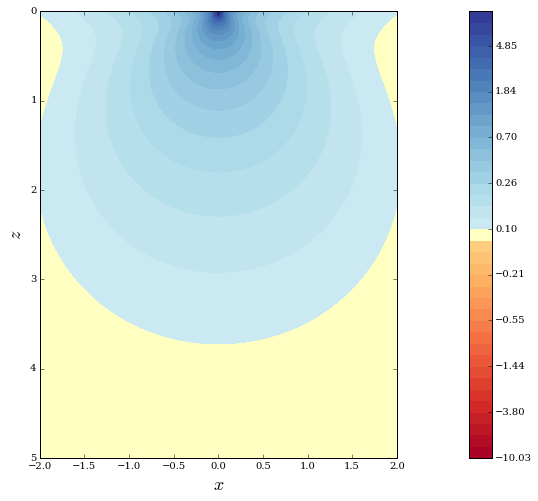

In [15]:
umag = sqrt((u.T*u)[0]).subs(r, rdef)
plt.figure(figsize=(10,8))
field_plot(umag, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

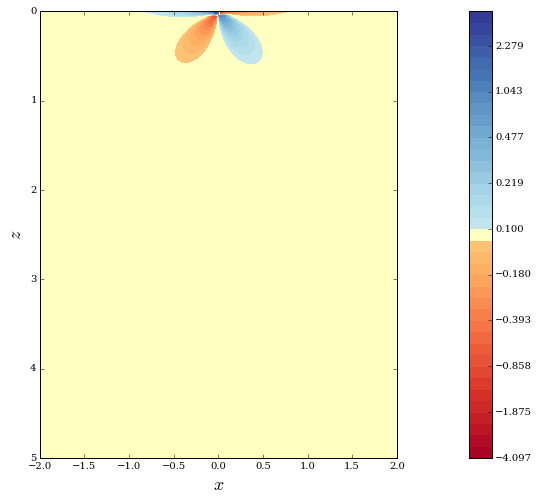

In [16]:
plt.figure(figsize=(10,8))
field_plot(ux, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

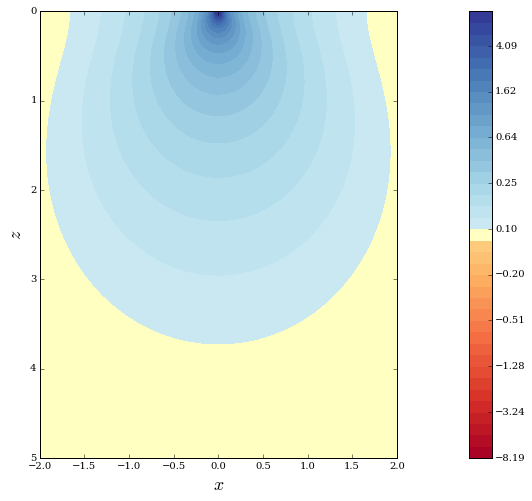

In [17]:
plt.figure(figsize=(10,8))
field_plot(uz, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

### Stresses

We can plot the components of stress

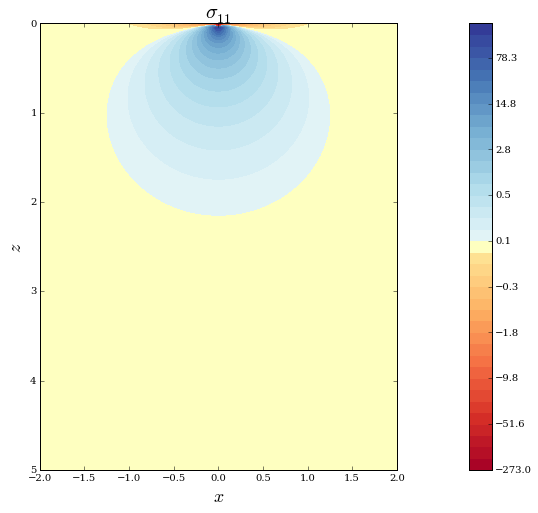

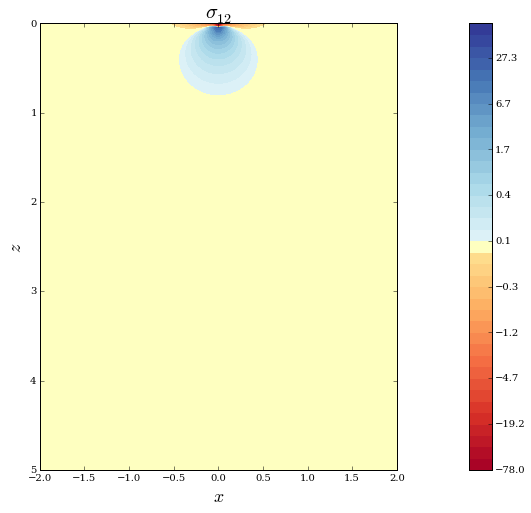

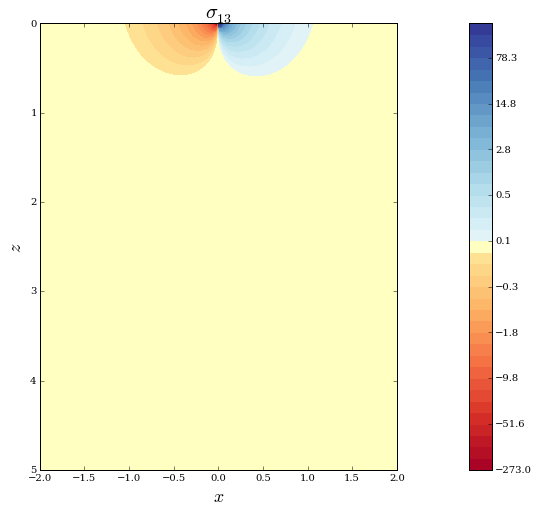

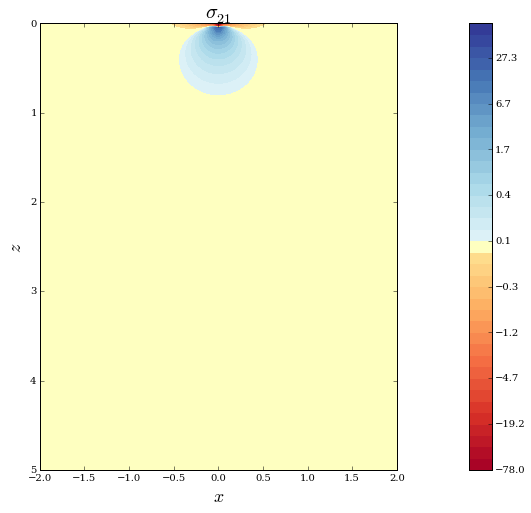

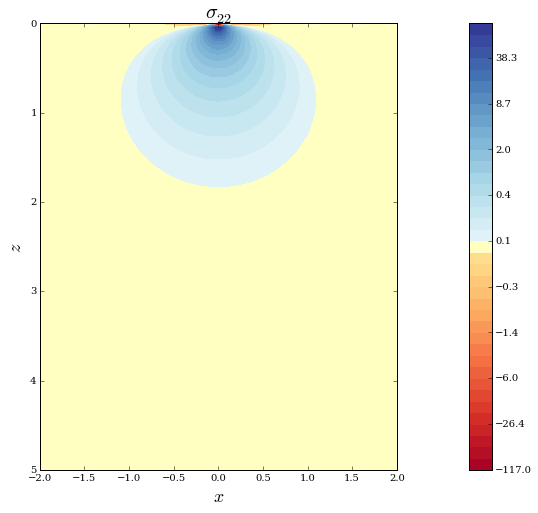

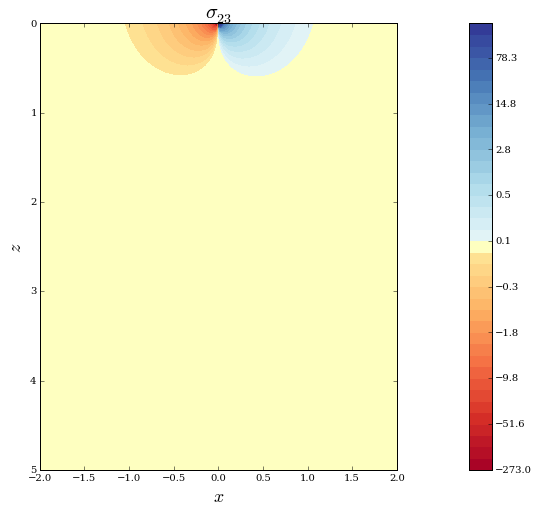

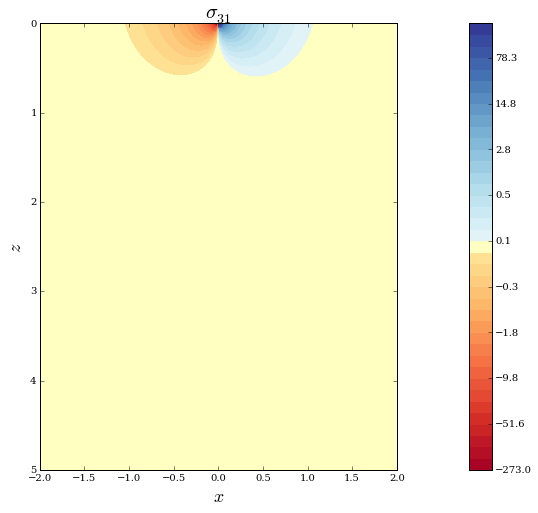

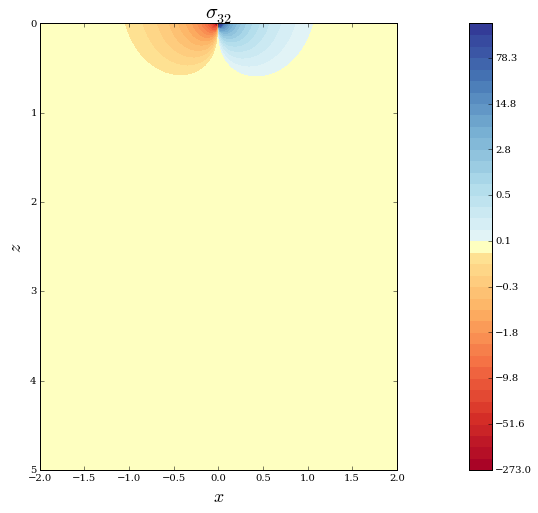

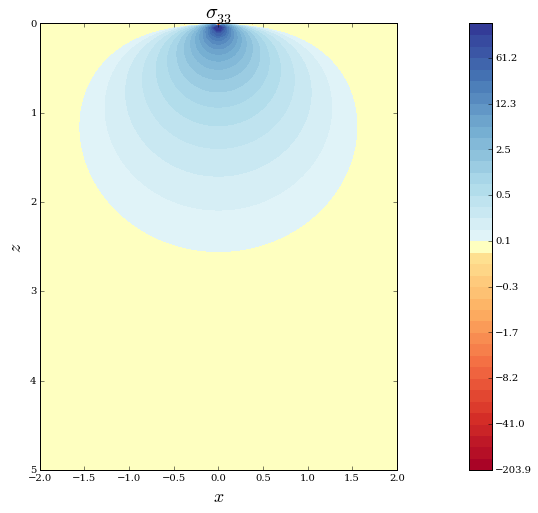

In [18]:
for row in range(0,3):
    for col in range(0,3):
        plt.figure(figsize=(10,8))
        field_plot(sigma[row,col], x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0, title=r"$\sigma_{%i%i}$"%(row+1, col+1))

plt.show()

We can also plot the invariants

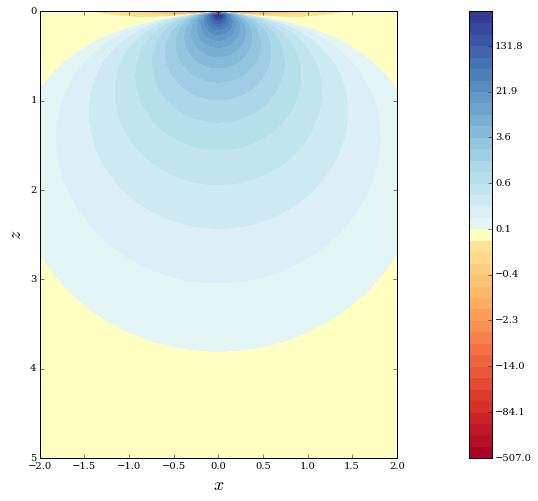

In [19]:
I1 = trace(sigma)
plt.figure(figsize=(10,8))
field_plot(I1, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

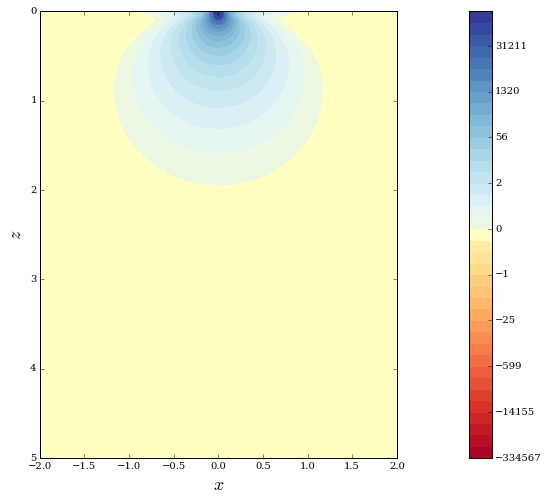

In [20]:
I2 = S(1)/2*(trace(sigma)**2 + trace(sigma**2))
plt.figure(figsize=(10,8))
field_plot(I2, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

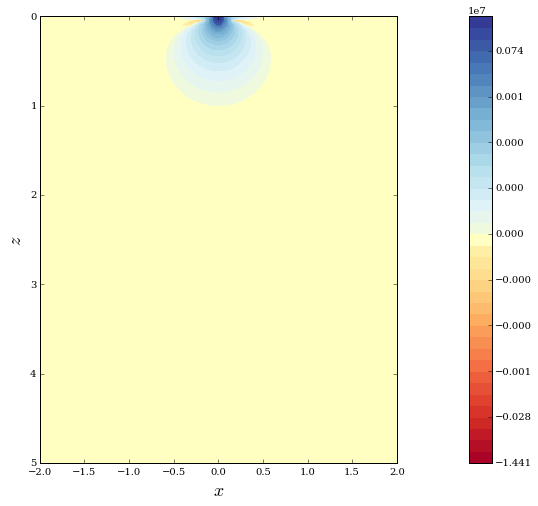

In [21]:
I3 = sigma[0,0]*sigma[1,1]*sigma[2,2] + 2*sigma[0,1]*sigma[1,2]*sigma[2,0] -\
    sigma[0,1]**2*sigma[2,2] - sigma[0,2]**2*sigma[0,0] - sigma[2,0]**2*sigma[1,1]
plt.figure(figsize=(10,8))
field_plot(I3, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

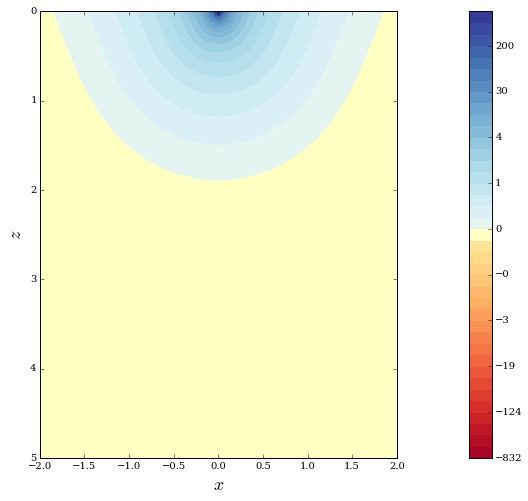

In [22]:
Mises = sqrt(((sigma[0,0] - sigma[1,1])**2 + (sigma[1,1] - sigma[2,2])**2 +
             (sigma[2,2] - sigma[0,0])**2 +
             6*(sigma[0,1]**2 + sigma[1,2]**2 + sigma[0,2]**2))/sqrt(2))
plt.figure(figsize=(10,8))
field_plot(Mises, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

In [23]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()